In [ ]:
import os

import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from torch.utils.data import DataLoader
import torch

ModuleNotFoundError: No module named 'kagglehub'

In [ ]:
path = kagglehub.dataset_download("heartzhacker/n-clahe")

print("Path to dataset files:", path)

Path to dataset files: /Users/nilsgamperli/.cache/kagglehub/datasets/heartzhacker/n-clahe/versions/1


In [ ]:
main_path = path + '/dataset/n-clahe'
train_images_polyp = []
train_images_normal = []
val_images_normal = []
val_images_polyp = []
for subdirectory in os.listdir(main_path):
    if subdirectory == '.DS_Store':
        continue
    if subdirectory == 'val':
        out_dir_polyp = train_images_polyp
        out_dir_normal = train_images_normal
    else:
        out_dir_polyp = val_images_polyp
        out_dir_normal = val_images_normal
    subdirectory_path = os.path.join(main_path, subdirectory)
    for sub_subdirectory in os.listdir(subdirectory_path):
        if sub_subdirectory == '.DS_Store':
            continue
        sub_subdirectory_path = os.path.join(subdirectory_path, sub_subdirectory)
        for filename in os.listdir(sub_subdirectory_path):
            img_path = os.path.join(sub_subdirectory_path, filename)
            img = cv2.imread(img_path)
            if img is not None and sub_subdirectory == 'polyps':
                out_dir_polyp.append(img)
            if img is not None and sub_subdirectory == 'normal-cecum':
                out_dir_normal.append(img)

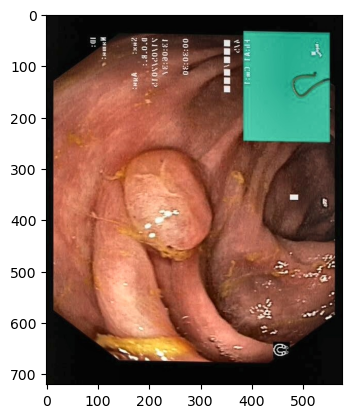

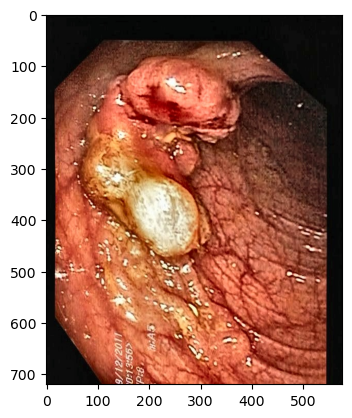

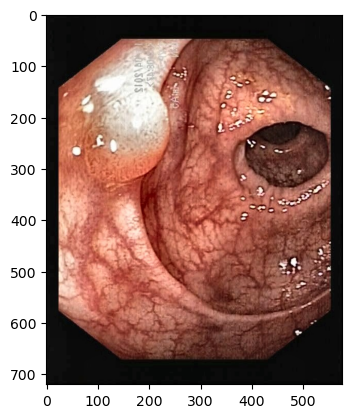

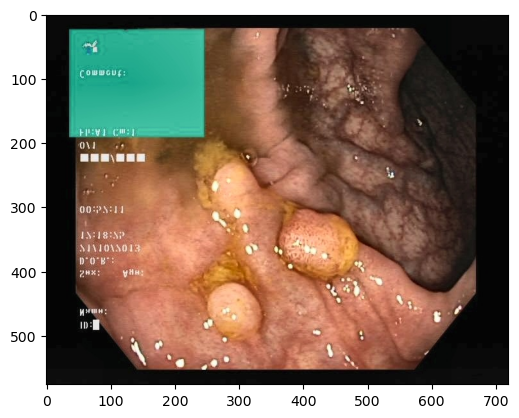

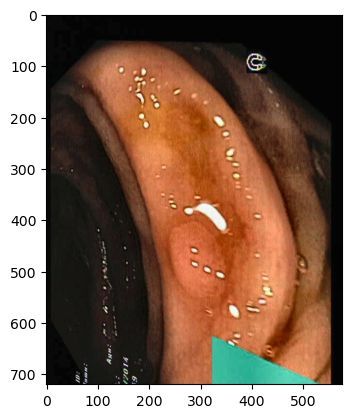

500

In [ ]:
for i in range(5):
    plt.imshow(cv2.cvtColor(train_images_polyp[i], cv2.COLOR_BGR2RGB))
    plt.show()
len(train_images_polyp)

In [ ]:
len_normal = len(train_images_normal)
len_polyp = len(train_images_polyp)
print(f"amount of polyp data {len_polyp}, amount of normal data {len_normal}")

amount of polyp data 500, amount of normal data 500


In [ ]:
# calculating average size of images
all_images = train_images_polyp + train_images_normal + val_images_normal + val_images_polyp
image_shapes = np.array([image.shape for image in all_images])
avg_image_height = np.average(image_shapes[:, 0])
avg_image_width = np.average(image_shapes[:, 1])
avg_image_channels = np.average(image_shapes[:,2])
print(f"Average Image Dimensions: {avg_image_height:.0f}x{avg_image_width:.0f} with {avg_image_channels} channels")
#Average Image Dimensions: 677.96x660.55 with 3.0 channels

Average Image Dimensions: 667x650 with 3.0 channels


In [ ]:
# Label the images
train_images = train_images_polyp + train_images_normal
val_images = val_images_polyp + val_images_normal

train_labels = [1] * len(train_images_polyp) + [0] * len(train_images_normal)
val_labels = [1] * len(val_images_polyp) + [0] * len(val_images_normal)

In [ ]:
from PolypDataset import PolypDataset
from torch.utils.data import DataLoader


train_dataset = PolypDataset(train_images, train_labels)
val_dataset = PolypDataset(val_images, val_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)



In [ ]:
# setup
import importlib
import Model
importlib.reload(Model)
from torch.optim import Adam
from torch import device, cuda
from torch.nn import CrossEntropyLoss

model = Model.CNN(2)
device = device("cuda" if cuda.is_available() else "cpu")
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.01)

In [ ]:
from train import train_one_epoch
num_epochs = 10
for epoch in range(num_epochs):  # num_epochs is the number of epochs you want to train for
    avg_loss, accuracy = train_one_epoch(model, train_loader, optimizer, criterion)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch 1/10, Loss: 0.7215, Accuracy: 0.5170
Epoch 2/10, Loss: 0.6673, Accuracy: 0.5860
Epoch 3/10, Loss: 0.5638, Accuracy: 0.6950
Epoch 4/10, Loss: 0.5028, Accuracy: 0.7650
Epoch 5/10, Loss: 0.5090, Accuracy: 0.7550
Epoch 6/10, Loss: 0.4642, Accuracy: 0.7900
Epoch 7/10, Loss: 0.4690, Accuracy: 0.7580


KeyboardInterrupt: 